# Clustering stocks using KMeans

Instructions:

- Import Normalizer from sklearn.preprocessing.
- Load Data
- Create an instance of Normalizer called normalizer.
- Create an instance of KMeans called kmeans with 10 clusters.
- Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.
- Fit the pipeline to the movements array.

In [1]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('company-stock-movements-2010-2015-incl.csv')

In [3]:
print(df.head())

         Unnamed: 0  2010-01-04  2010-01-05  2010-01-06  2010-01-07  \
0             Apple    0.580000   -0.220005   -3.409998   -1.170000   
1               AIG   -0.640002   -0.650000   -0.210001   -0.420000   
2            Amazon   -2.350006    1.260009   -2.350006   -2.009995   
3  American express    0.109997    0.000000    0.260002    0.720002   
4            Boeing    0.459999    1.770000    1.549999    2.690003   

   2010-01-08  2010-01-11  2010-01-12  2010-01-13  2010-01-14  ...  \
0    1.680011   -2.689994   -1.469994    2.779997   -0.680003  ...   
1    0.710001   -0.200001   -1.130001    0.069999   -0.119999  ...   
2    2.960006   -2.309997   -1.640007    1.209999   -1.790001  ...   
3    0.190003   -0.270001    0.750000    0.300004    0.639999  ...   
4    0.059997   -1.080002    0.360000    0.549999    0.530002  ...   

   2013-10-16  2013-10-17  2013-10-18  2013-10-21  2013-10-22  2013-10-23  \
0    0.320008    4.519997    2.899987    9.590019   -6.540016    5.959976  

In [4]:
movements = df.iloc[:, 1:].values
companies = df.iloc[:, 0].values

In [5]:
print(movements)

[[ 5.8000000e-01 -2.2000500e-01 -3.4099980e+00 ... -5.3599620e+00
   8.4001900e-01 -1.9589981e+01]
 [-6.4000200e-01 -6.5000000e-01 -2.1000100e-01 ... -4.0001000e-02
  -4.0000200e-01  6.6000000e-01]
 [-2.3500060e+00  1.2600090e+00 -2.3500060e+00 ...  4.7900090e+00
  -1.7600090e+00  3.7400210e+00]
 ...
 [ 4.3000100e-01  2.2999600e-01  5.7000000e-01 ... -2.6000200e-01
   4.0000100e-01  4.8000300e-01]
 [ 9.0000000e-02  1.0000000e-02 -8.0000000e-02 ... -3.0000000e-02
   2.0000000e-02 -3.0000000e-02]
 [ 1.5999900e-01  1.0001000e-02  0.0000000e+00 ... -6.0001000e-02
   2.5999800e-01  9.9998000e-02]]


In [6]:
print(companies)

['Apple' 'AIG' 'Amazon' 'American express' 'Boeing' 'Bank of America'
 'British American Tobacco' 'Canon' 'Caterpillar' 'Colgate-Palmolive'
 'ConocoPhillips' 'Cisco' 'Chevron' 'DuPont de Nemours' 'Dell' 'Ford'
 'General Electrics' 'Google/Alphabet' 'Goldman Sachs' 'GlaxoSmithKline'
 'Home Depot' 'Honda' 'HP' 'IBM' 'Intel' 'Johnson & Johnson'
 'JPMorgan Chase' 'Kimberly-Clark' 'Coca Cola' 'Lookheed Martin'
 'MasterCard' 'McDonalds' '3M' 'Microsoft' 'Mitsubishi' 'Navistar'
 'Northrop Grumman' 'Novartis' 'Pepsi' 'Pfizer' 'Procter Gamble'
 'Philip Morris' 'Royal Dutch Shell' 'SAP' 'Schlumberger' 'Sony'
 'Sanofi-Aventis' 'Symantec' 'Toyota' 'Total'
 'Taiwan Semiconductor Manufacturing' 'Texas instruments' 'Unilever'
 'Valero Energy' 'Walgreen' 'Wells Fargo' 'Wal-Mart' 'Exxon' 'Xerox'
 'Yahoo']


In [7]:
k_clusters = range(3, 16)
inertias = []
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(movements)
    inertias.append(kmeans.inertia_)

C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

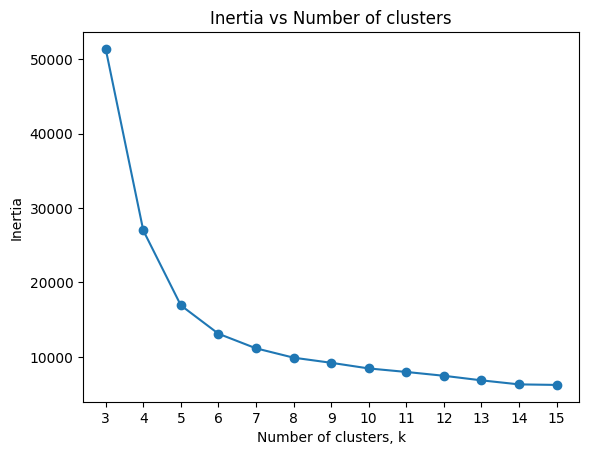

In [8]:
plt.plot(k_clusters, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of clusters')
plt.xticks(k_clusters)
plt.show()

In [9]:
best_k = 10

In [10]:
# Create a KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=best_k)

In [11]:
# Create a normalizer: normalizer
normalizer = Normalizer()

In [12]:
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

In [13]:
# Fit pipeline to the daily price movements
pipeline.fit(movements)

C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [14]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

In [15]:
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

In [16]:
#show confusion matrix
ct = pd.crosstab(df['labels'], df['companies'])
print(ct)

companies  3M  AIG  Amazon  American express  Apple  Bank of America  Boeing  \
labels                                                                         
0           0    0       0                 0      0                0       0   
1           0    0       0                 0      0                0       0   
2           0    0       0                 0      0                0       0   
3           0    0       1                 0      1                0       0   
4           0    0       0                 0      0                0       0   
5           0    0       0                 0      0                0       0   
6           0    0       0                 0      0                0       0   
7           0    1       0                 1      0                1       0   
8           0    0       0                 0      0                0       1   
9           1    0       0                 0      0                0       0   

companies  British American Tobacco  Ca